# Prosper Loan Dataset Analysis - Part 1
## William Orona

## Data Wrangling

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Read dataset
loans_df_original = pd.read_csv('prosperloanData.csv')

In [3]:
#Copy dataframe
loans_df = loans_df_original.copy(deep=True)

In [4]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#View sample of data
pd.set_option("display.max_columns", 81)
loans_df.sample(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
99579,24A034013909854134FF7FD,211352,2007-10-05 06:34:01.987000000,A,36,Chargedoff,2010-12-11 00:00:00,0.12669,0.1150,0.1100,NaN,NaN,NaN,NaN,NaN,NaN,0,FL,Realtor,Self-employed,1.0,False,False,NaN,2007-10-03 05:38:40.923000000,720.0,739.0,2006-08-31 00:00:00,2.0,2.0,2.0,2,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4500.0,2.0,1.00,1.0,0.02,"$25,000-49,999",True,2500.000000,01743401085645831F3CE82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1307,38.0,77,20581,1500,2007-10-11 00:00:00,Q4 2007,C2883400873225889F656AF,49.46,1687.1800,1269.42,417.7600,-8.05,-108.57,230.57,230.58,0.0,1.0,0,0,0.00,16
58631,092D35487471465448D17F2,598333,2012-06-10 20:03:14.047000000,NaN,60,Current,NaN,0.16151,0.1385,0.1285,0.12800,0.0200,0.10800,6.0,A,8.0,14,TN,Engineer - Electrical,Employed,117.0,True,False,NaN,2012-06-10 20:03:12,700.0,719.0,1997-09-30 00:00:00,9.0,9.0,13.0,6,127.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,11580.0,0.73,3897.0,13.0,0.84,0.0,0.16,"$100,000+",True,8416.666667,B3F33653730592522B3B49B,1.0,7.0,7.0,0.0,0.0,5000.0,4304.87,-21.0,0,NaN,21,67849,7000,2012-06-13 00:00:00,Q2 2012,7D6D3529708544148CA1F0F,162.33,3246.6000,1818.81,1427.7900,-103.10,0.00,0.00,0.00,0.0,1.0,0,0,0.00,103
48593,FDD035847584061835CE146,855774,2013-07-30 16:54:29.050000000,NaN,60,Past Due (1-15 days),NaN,0.22693,0.2024,0.1924,0.18000,0.0699,0.11010,4.0,C,3.0,1,MD,Food Service Management,Employed,314.0,True,False,NaN,2013-07-30 16:54:22,780.0,799.0,1990-05-12 00:00:00,12.0,11.0,26.0,9,627.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,26485.0,0.25,77527.0,22.0,0.95,1.0,0.28,"$50,000-74,999",True,4916.666667,F3233689284367080506EDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,7,97530,15000,2013-08-05 00:00:00,Q3 2013,FCB435846237886178DC142,399.41,2381.4600,778.24,1603.2200,-79.21,0.00,0.00,0.00,0.0,1.0,0,0,0.00,117
14620,E8DE35799819718129781E6,783483,2013-05-19 14:06:03.150000000,NaN,60,Current,NaN,0.12716,0.1049,0.0949,0.09190,0.0274,0.06450,6.0,A,8.0,1,WA,Professional,Employed,26.0,False,False,NaN,2013-05-19 12:17:39,740.0,759.0,2001-12-01 00:00:00,13.0,9.0,26.0,9,663.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21111.0,0.48,22211.0,18.0,1.00,0.0,0.20,"$50,000-74,999",True,6166.666667,F5B2368320347618465A261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,10,91289,18000,2013-05-23 00:00:00,Q2 2013,37783578222117638CA6999,386.80,3466.2000,2111.51,1354.6900,-120.29,0.00,0.00,0.00,0.0,1.0,0,0,0.00,1
74072,E3F434241505779046745A8,359740,2008-06-30 07:37:33.5600

In [6]:
#Truncate dataframe
columns = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ProsperScore', 'ListingCategory (numeric)', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate']
loans_trunc = loans_df[columns]

In [7]:
#Check datatypes
loans_trunc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingNumber              113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   CreditGrade                28953 non-null   object 
 4   Term                       113937 non-null  int64  
 5   LoanStatus                 113937 non-null  object 
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   CreditScoreRangeLower      113346 non-null  float64
 10  CreditScoreRangeUpper      113346 non-null  float64
 11  StatedMonthlyIncome        113937 non-null  float64
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanOriginationDate        11

In [8]:
#Change dates to datetime datatype
loans_trunc['ListingCreationDate'] = pd.to_datetime(loans_trunc['ListingCreationDate'])
loans_trunc['LoanOriginationDate'] = pd.to_datetime(loans_trunc['LoanOriginationDate'])

<ipython-input-8-bf60153b68fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_trunc['ListingCreationDate'] = pd.to_datetime(loans_trunc['ListingCreationDate'])
<ipython-input-8-bf60153b68fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_trunc['LoanOriginationDate'] = pd.to_datetime(loans_trunc['LoanOriginationDate'])


In [9]:
loans_trunc.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [10]:
loans_trunc.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
#Change credit grade and loan status to ordinal categorical data.
CreditGrade_ord = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
LoanStatus_ord = ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff', 'Cancelled']
CreditGrade_cats = pd.api.types.CategoricalDtype(ordered = True, categories = CreditGrade_ord)
LoanStatus_cats = pd.api.types.CategoricalDtype(ordered = True, categories = LoanStatus_ord)
loans_trunc['CreditGrade'] = loans_trunc['CreditGrade'].astype(CreditGrade_cats)
loans_trunc['LoanStatus'] = loans_trunc['LoanStatus'].astype(LoanStatus_cats)

<ipython-input-11-b1d841d90e05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_trunc['CreditGrade'] = loans_trunc['CreditGrade'].astype(CreditGrade_cats)
<ipython-input-11-b1d841d90e05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_trunc['LoanStatus'] = loans_trunc['LoanStatus'].astype(LoanStatus_cats)


In [12]:
#Testing datatypes
loans_trunc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 113937 non-null  object        
 1   ListingNumber              113937 non-null  int64         
 2   ListingCreationDate        113937 non-null  datetime64[ns]
 3   CreditGrade                28953 non-null   category      
 4   Term                       113937 non-null  int64         
 5   LoanStatus                 113672 non-null  category      
 6   ProsperScore               84853 non-null   float64       
 7   ListingCategory (numeric)  113937 non-null  int64         
 8   IsBorrowerHomeowner        113937 non-null  bool          
 9   CreditScoreRangeLower      113346 non-null  float64       
 10  CreditScoreRangeUpper      113346 non-null  float64       
 11  StatedMonthlyIncome        113937 non-null  float64 

In [13]:
loans_trunc.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [14]:
loans_trunc.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [15]:
loans_trunc.CreditGrade.isnull().sum()

84984

In [16]:
loans_trunc.ProsperScore.isnull().sum()

29084

In [17]:
#Drop rows with null in CreditGrade and ProsperScore plus nulls in either LoanStatus or CreditScoreRangeLower.
loans_trunc.dropna(subset=['CreditGrade', 'ProsperScore'], how='all', inplace=True)
loans_trunc.dropna(subset=['LoanStatus', 'CreditScoreRangeLower'], inplace=True)

<ipython-input-17-541cfd7db03e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_trunc.dropna(subset=['CreditGrade', 'ProsperScore'], how='all', inplace=True)
<ipython-input-17-541cfd7db03e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_trunc.dropna(subset=['LoanStatus', 'CreditScoreRangeLower'], inplace=True)


In [18]:
loans_trunc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112950 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 112950 non-null  object        
 1   ListingNumber              112950 non-null  int64         
 2   ListingCreationDate        112950 non-null  datetime64[ns]
 3   CreditGrade                28362 non-null   category      
 4   Term                       112950 non-null  int64         
 5   LoanStatus                 112950 non-null  category      
 6   ProsperScore               84588 non-null   float64       
 7   ListingCategory (numeric)  112950 non-null  int64         
 8   IsBorrowerHomeowner        112950 non-null  bool          
 9   CreditScoreRangeLower      112950 non-null  float64       
 10  CreditScoreRangeUpper      112950 non-null  float64       
 11  StatedMonthlyIncome        112950 non-null  float64 

### Structure of dataset

After truncation of dataset there are 122950 entries and 14 features.<br>
CreditGrade is ordinal: 'AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'<br>
LoanStatus was made ordinal according to my judgement: 'Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff', 'Cancelled'


### Main feature of interest

What factors are the best predictors of ideal debtors (those who have a loan status of either 'Completed', 'FinalPaymentInProgress', or 'Current'?

## Univariate Exploration

The dataframe is split here because a different proprietary method is used to score applicants after July 2009.  Since it is not known how to compare the different scoring methods they will have to be analysed separatly.

In [19]:
#Dataframe with non-null CreditGrade values (pre-August 2009)
pre_2009_df = loans_trunc[loans_trunc['CreditGrade'].notnull()]

In [20]:
#Dataframe with non-null ProsperScore values (post-July 2009)
post_2009_df = loans_trunc[loans_trunc['ProsperScore'].notnull()]

In [21]:
pre_2009_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28362 entries, 0 to 113927
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 28362 non-null  object        
 1   ListingNumber              28362 non-null  int64         
 2   ListingCreationDate        28362 non-null  datetime64[ns]
 3   CreditGrade                28362 non-null  category      
 4   Term                       28362 non-null  int64         
 5   LoanStatus                 28362 non-null  category      
 6   ProsperScore               0 non-null      float64       
 7   ListingCategory (numeric)  28362 non-null  int64         
 8   IsBorrowerHomeowner        28362 non-null  bool          
 9   CreditScoreRangeLower      28362 non-null  float64       
 10  CreditScoreRangeUpper      28362 non-null  float64       
 11  StatedMonthlyIncome        28362 non-null  float64       
 12  Loa

In [22]:
post_2009_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84588 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 84588 non-null  object        
 1   ListingNumber              84588 non-null  int64         
 2   ListingCreationDate        84588 non-null  datetime64[ns]
 3   CreditGrade                0 non-null      category      
 4   Term                       84588 non-null  int64         
 5   LoanStatus                 84588 non-null  category      
 6   ProsperScore               84588 non-null  float64       
 7   ListingCategory (numeric)  84588 non-null  int64         
 8   IsBorrowerHomeowner        84588 non-null  bool          
 9   CreditScoreRangeLower      84588 non-null  float64       
 10  CreditScoreRangeUpper      84588 non-null  float64       
 11  StatedMonthlyIncome        84588 non-null  float64       
 12  Loa

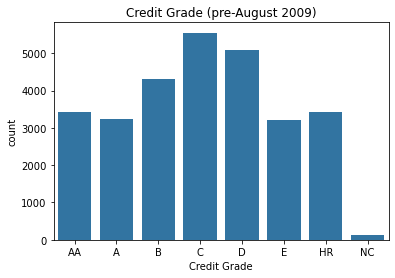

In [23]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=pre_2009_df, x='CreditGrade', color=base_color);
ax.set_title('Credit Grade (pre-August 2009)');
ax.set_xlabel('Credit Grade');

Credit grade is unimodal at a grade of C.

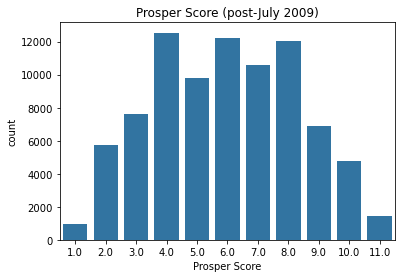

In [24]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=post_2009_df, x='ProsperScore', color=base_color);
ax.set_title('Prosper Score (post-July 2009)');
ax.set_xlabel('Prosper Score');

Prosper Score is unimodal at 4.0.

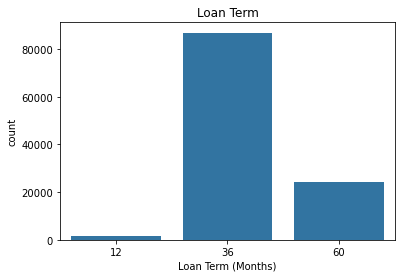

In [25]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans_trunc, x='Term', color=base_color);
ax.set_title('Loan Term');
ax.set_xlabel('Loan Term (Months)');

The vast majority of loans are on a 36 month term with a significant minority on 60 month.  Very few are on 12 month.

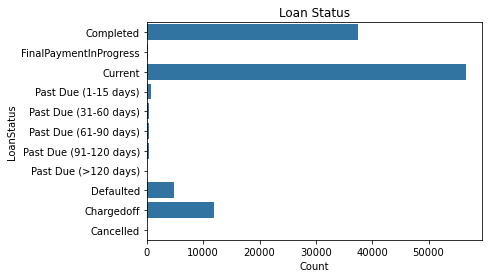

In [26]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans_trunc, y='LoanStatus', color=base_color);
ax.set_title('Loan Status');
ax.set_xlabel('Count');

Most loans are either completed or current.  Loan status is an important variable since it will be compared to others to find the best predictors of a profitable loan.

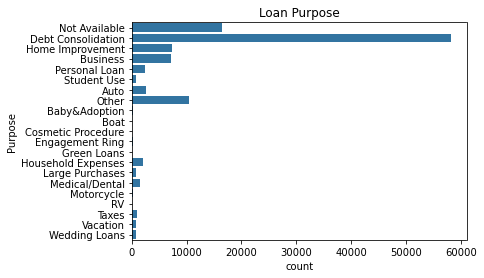

In [27]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans_trunc, y='ListingCategory (numeric)', color=base_color);
ax.set_title('Loan Purpose');
ax.set_ylabel('Purpose');
ax.set_yticklabels(['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']);

The majority of loans are for debt consolidation but another large plurality are either not available or other.

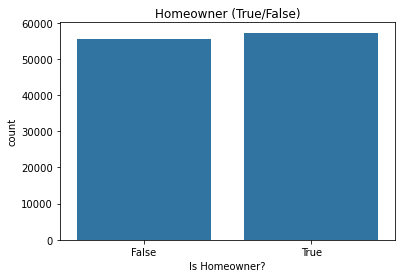

In [28]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans_trunc, x='IsBorrowerHomeowner', color=base_color);
ax.set_title('Homeowner (True/False)');
ax.set_xlabel('Is Homeowner?');

Homeownership is roughly split evenly among borrowers with slightly more homeowners.

In [29]:
loans_trunc['creditScores'] = loans_trunc[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

<ipython-input-29-3ac44091f0e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_trunc['creditScores'] = loans_trunc[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)


In [30]:
loans_trunc.creditScores.value_counts()

689.5    16436
669.5    16296
709.5    15423
729.5    12868
649.5    12144
749.5     9229
769.5     6579
789.5     4618
629.5     4160
609.5     3587
809.5     2639
529.5     1593
549.5     1474
829.5     1405
569.5     1357
589.5     1125
849.5      563
509.5      554
489.5      346
869.5      211
469.5      141
9.5        133
449.5       36
889.5       27
429.5        5
369.5        1
Name: creditScores, dtype: int64

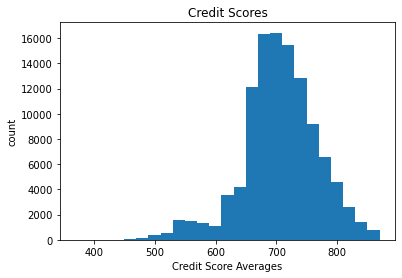

In [31]:
bins = np.arange(369.5, loans_trunc['creditScores'].max(), 20);
plt.hist(data=loans_trunc, x='creditScores', bins=bins);
plt.xlabel('Credit Score Averages');
plt.ylabel('count');
plt.title('Credit Scores');

Credit scores are unimodal around 700.

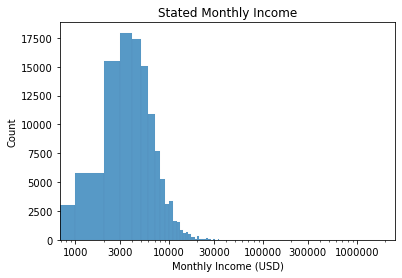

In [32]:
base_color = sb.color_palette()[0]
bins = np.arange(loans_trunc['StatedMonthlyIncome'].min(), loans_trunc['StatedMonthlyIncome'].max(), 1000);
ax = sb.histplot(data=loans_trunc, x='StatedMonthlyIncome', color=base_color, bins=bins);
ax.set_xscale('log');
ax.set_xlabel('Monthly Income (USD)');
ax.set_xticks([1000, 3000, 10000, 30000, 100000, 300000, 1000000]);
ax.set_xticklabels([1000, 3000, 10000, 30000, 100000, 300000, 1000000]);
ax.set_title('Stated Monthly Income');

Monthly income is right skewed and unimodal around 4000 dollars.  Note log scale on x-axis.

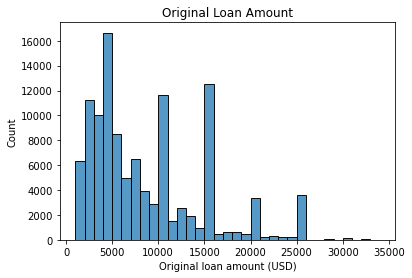

In [33]:
bins = np.arange(loans_trunc['LoanOriginalAmount'].min(), loans_trunc['LoanOriginalAmount'].max(), 1000);
ax = sb.histplot(data=loans_trunc, x='LoanOriginalAmount', color=base_color, bins=bins);
ax.set_xlabel('Original loan amount (USD)');
ax.set_title('Original Loan Amount');

Loan amounts are multimodal with peaks around 'round' numbers in multiples of 5000 dollars.  4000 dollars is the most common loan amount.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Variables used to rate applicants like Prosper Score, Credit Score, and Credit Grade are unimodal with peaks around the center of their respective ranges.  Loan terms are mostly 36 months.  Most applicates stated debt consolidation was the purpose of their loan but many did not give a reason or selected the 'other' category.  Most borrowers were in good standing.  There was an unusal point of stated monthly income being 1.75 million with a loan amount of 4000, perhaps this is an error?  The scale of stated monthly income needed to be transformed to log scale because of its right-skewedness.  Loan amounts were more common at 'round' numbers in muliples of 1000 and 5000 dollars.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Datatypes were changed as needed, for example Credit Grades were changed to categorical datatype.  Some other datatypes were changed to datetime as appropriate.

## Bivariate Exploration

In [34]:
numeric_vars = ['ProsperScore', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'creditScores']
categorical_vars = ['CreditGrade', 'Term', 'LoanStatus', 'ListingCategory (numeric)', 'IsBorrowerHomeowner']

In [35]:
loans_trunc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112950 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 112950 non-null  object        
 1   ListingNumber              112950 non-null  int64         
 2   ListingCreationDate        112950 non-null  datetime64[ns]
 3   CreditGrade                28362 non-null   category      
 4   Term                       112950 non-null  int64         
 5   LoanStatus                 112950 non-null  category      
 6   ProsperScore               84588 non-null   float64       
 7   ListingCategory (numeric)  112950 non-null  int64         
 8   IsBorrowerHomeowner        112950 non-null  bool          
 9   CreditScoreRangeLower      112950 non-null  float64       
 10  CreditScoreRangeUpper      112950 non-null  float64       
 11  StatedMonthlyIncome        112950 non-null  float64 

#### Numeric vs numeric variables

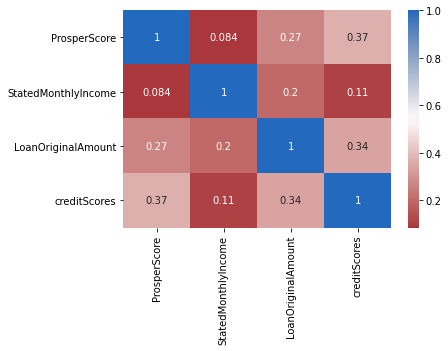

In [36]:
#Plotting numeric variable correlations.
sb.heatmap(loans_trunc[numeric_vars].corr(), annot=True, cmap = 'vlag_r');

There are only weak correlations here.  Prosper score and credit scores are weakly correlated but that is not suprising given that they have similar goals.  Loan amount and credit scores are also weakly correlated.

#### Categorical vs numeric variables

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

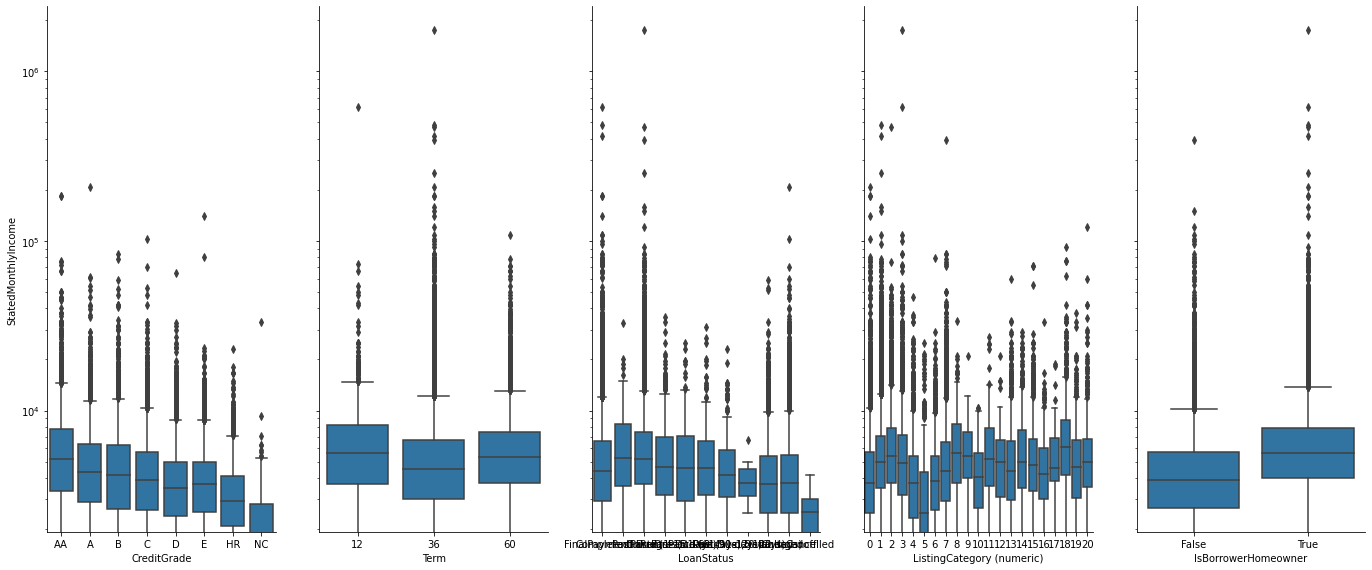

In [37]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    g = sb.boxplot(x, y, color = default_color)
    g.set_yscale('log')

g = sb.PairGrid(data = loans_trunc, y_vars = 'StatedMonthlyIncome', x_vars = categorical_vars)
g.fig.set_size_inches(20,10)
g.map(boxgrid)
plt.show();

*Some of these plots are too small to read easily see below for larger plots.<br>
Higher monthly incomes seem to be related to higher Credit Grades and homeowners have higher incomes.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

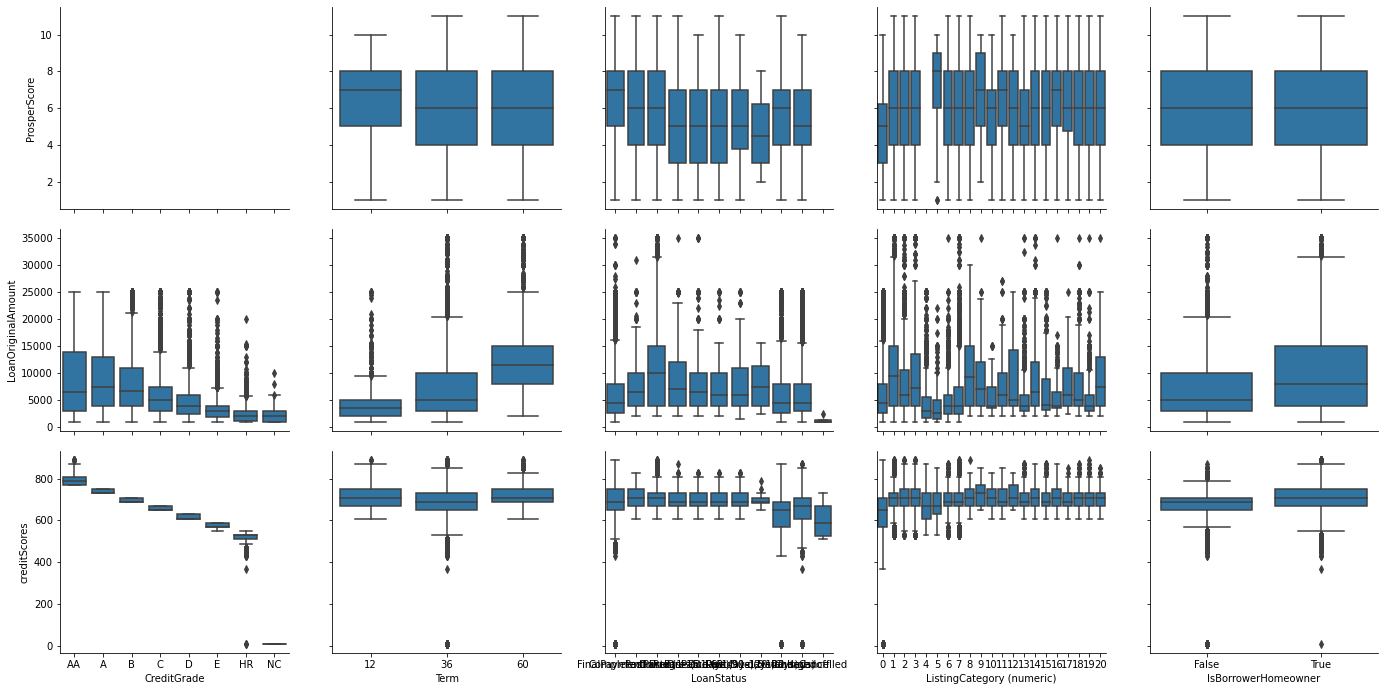

In [38]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    g = sb.boxplot(x, y, color = default_color)
g = sb.PairGrid(data = loans_trunc, y_vars = ['ProsperScore', 'LoanOriginalAmount', 'creditScores'], x_vars = categorical_vars)
g.fig.set_size_inches(20,10)
g.map(boxgrid)
plt.show();

*See below for some larger plots.<br>
Higher original loan amounts have longer terms.  Homeowners also have higher credit scores and larger orignal loan amounts.  Credit grade and credit score are highly related.

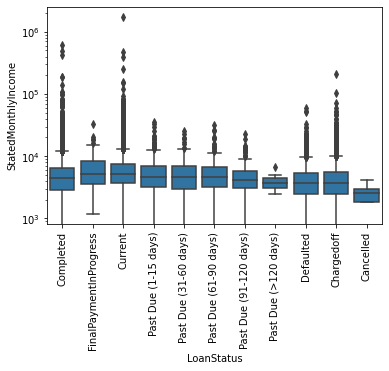

In [39]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='LoanStatus', y='StatedMonthlyIncome', color=default_color);
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Having a higher monthly income means you are more likely to have a loan in good standing.

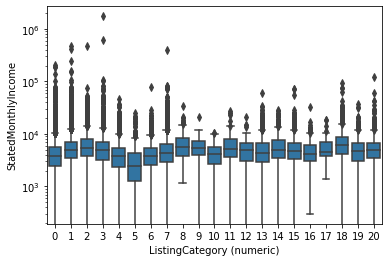

In [40]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='ListingCategory (numeric)', y='StatedMonthlyIncome', color=default_color);
ax.set_yscale('log')

Taking a loan for student use means one likely has a lower income.

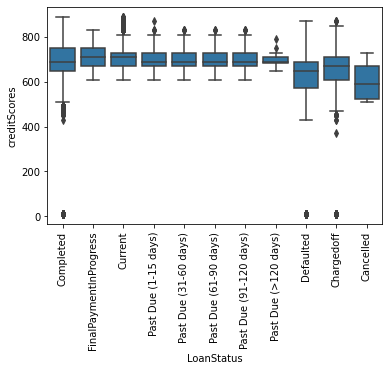

In [41]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='LoanStatus', y='creditScores', color=default_color);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Lower credit scores are more likely to fail to complete terms of loan.

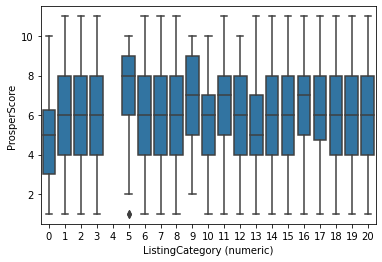

In [42]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='ListingCategory (numeric)', y='ProsperScore', color=default_color);

Suprisingly people taking loans for student use have higher Prosper Scores.  People taking loans for household use tend to have lower prosper scores.

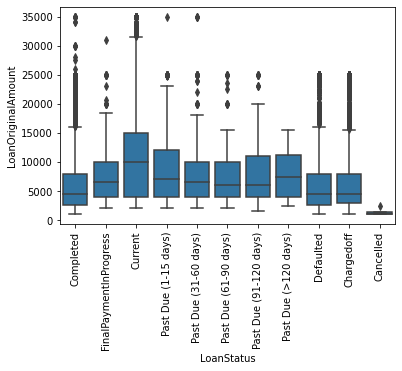

In [43]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='LoanStatus', y='LoanOriginalAmount', color=default_color);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

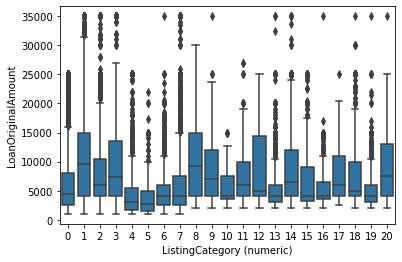

In [44]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='ListingCategory (numeric)', y='LoanOriginalAmount', color=default_color);

Debt consolidation, buisiness, baby and adoption loans have relatively high original loan amounts.  Personal, student, auto, cosmetic procedure, household expense and vacation loans are have relatively lower orignal loan amounts. 

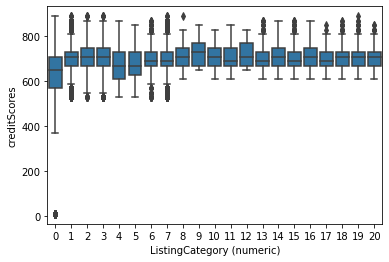

In [45]:
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=loans_trunc, x='ListingCategory (numeric)', y='creditScores', color=default_color);

Credit scores are lower for the personal loan and student loan category.  Interestingly student loans had higher Prosper Scores (see previous plot).

#### Categorical vs categorical variables

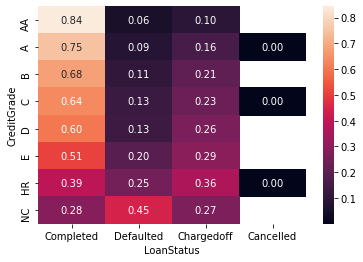

In [46]:
table = loans_trunc.groupby('CreditGrade')['LoanStatus'].value_counts(normalize=True).unstack('LoanStatus');
sb.heatmap(table, annot=True, fmt='.2f');

Higer Credit Grades are related to more loans in good standing.

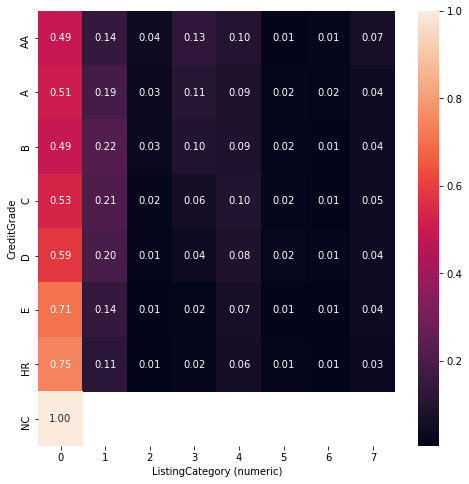

In [47]:
table = loans_trunc.groupby('CreditGrade')['ListingCategory (numeric)'].value_counts(normalize=True).unstack('ListingCategory (numeric)')
plt.subplots(figsize=(8,8));
sb.heatmap(table, annot=True, fmt='.2f');

Those with the 'not available' listing category have lower Credit Grade.  Buisiness loans have higher Credit Grades.

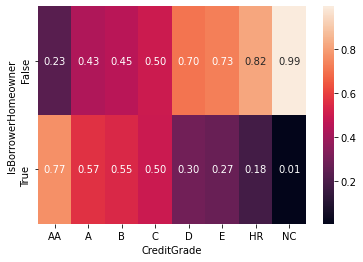

In [48]:
table = loans_trunc.groupby('CreditGrade')['IsBorrowerHomeowner'].value_counts(normalize=True).unstack('CreditGrade');
sb.heatmap(table, annot=True, fmt='.2f');

There is a strong relationship between owning a home and having a high Credit Grade.

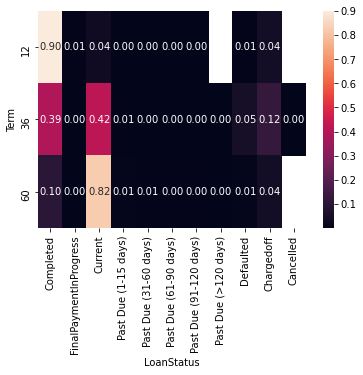

In [49]:
table = loans_trunc.groupby('Term')['LoanStatus'].value_counts(normalize=True).unstack('LoanStatus');
sb.heatmap(table, annot=True, fmt='.2f');

12 and 60 month loans seem to be the mostly likely to be in good standing.

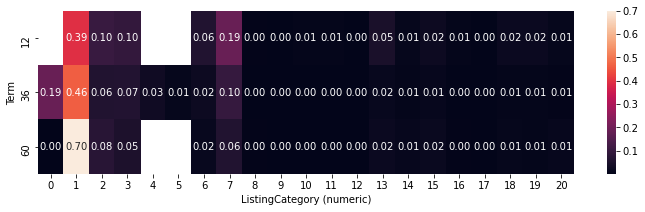

In [50]:
table = loans_trunc.groupby('Term')['ListingCategory (numeric)'].value_counts(normalize=True).unstack('ListingCategory (numeric)');
plt.figure(figsize = [12, 3])
sb.heatmap(table, annot=True, fmt='.2f');

Auto and 'other' listing categories are on shorter loan terms.  Debt consolidation is on longer loan terms.

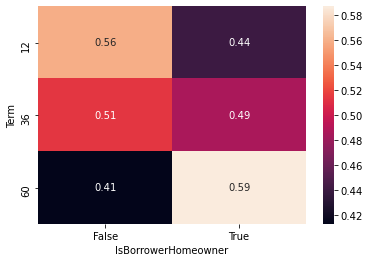

In [51]:
table = loans_trunc.groupby('Term')['IsBorrowerHomeowner'].value_counts(normalize=True).unstack('IsBorrowerHomeowner')
sb.heatmap(table, annot=True, fmt='.2f');

Homeowners have longer loan terms.

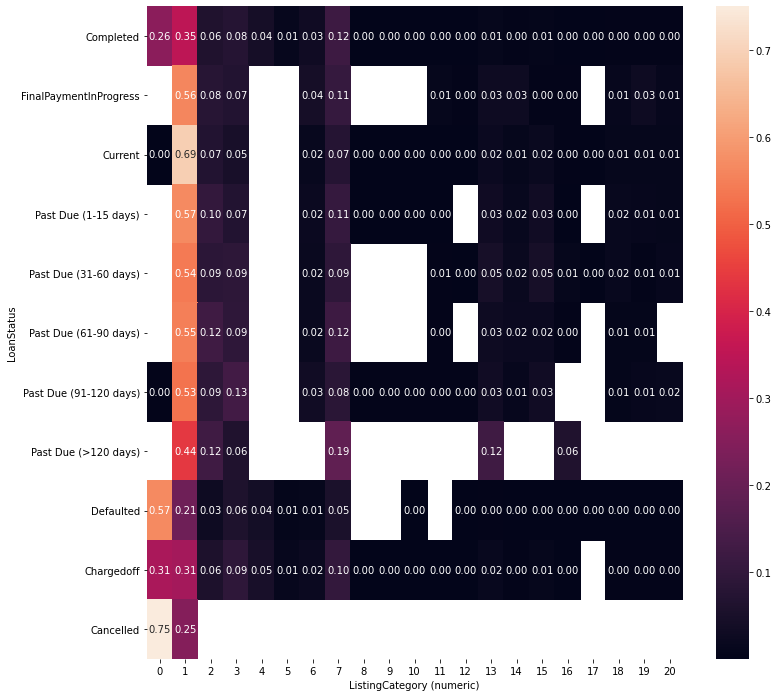

In [52]:
table = loans_trunc.groupby('LoanStatus')['ListingCategory (numeric)'].value_counts(normalize=True).unstack()
plt.subplots(figsize=(12,12));
sb.heatmap(table, annot=True, fmt='.2f');

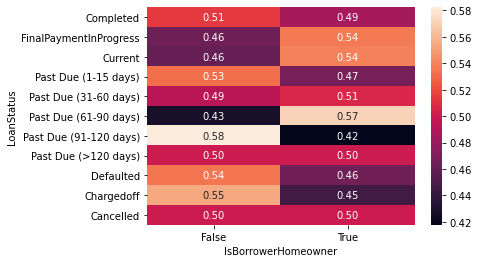

In [53]:
table = loans_trunc.groupby('LoanStatus')['IsBorrowerHomeowner'].value_counts(normalize=True).unstack('IsBorrowerHomeowner')
sb.heatmap(table, annot=True, fmt='.2f');

Homeowners are more likely to be in good standing.

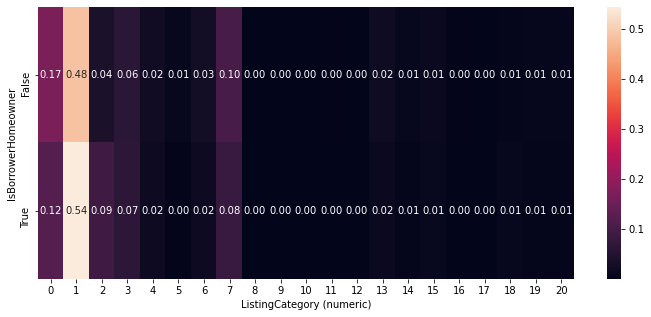

In [54]:
table = loans_trunc.groupby('IsBorrowerHomeowner')['ListingCategory (numeric)'].value_counts(normalize=True).unstack('ListingCategory (numeric)')
plt.figure(figsize=(12, 5))
sb.heatmap(table, annot=True, fmt='.2f');

Not suprisingly homeowners are much more likley to take out loans for home improvement.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- None of the numeric vs numeric relationships were more than weakly correlated.
- Higher income individuals have higher credit scores and are more likely to complete the terms of the loan.
- Surprisingly those taking loans for student purposes have higher Prosper Scores but lower credit scores.
- Homeowners have higher credit scores and Credit Grades and are more likely to complete the terms of a loan.
- Unlike Credit Grades and credit scores Prosper Scores do not seem to be related to home ownership.
- Larger original loan amounts have longer loan terms.

## Multivariate Exploration

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


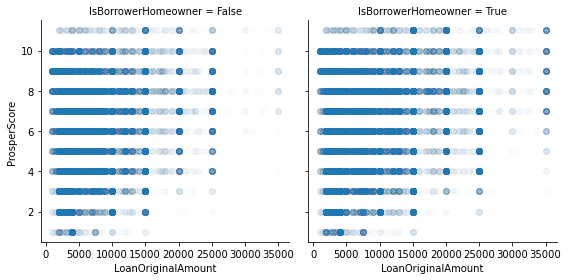

In [55]:
g = sb.FacetGrid(data = loans_trunc, col = 'IsBorrowerHomeowner', size = 4);
g.map(plt.scatter, 'LoanOriginalAmount', 'ProsperScore', alpha=0.01);

Homeowners have a higher Prosper Score and higher original loan amount.

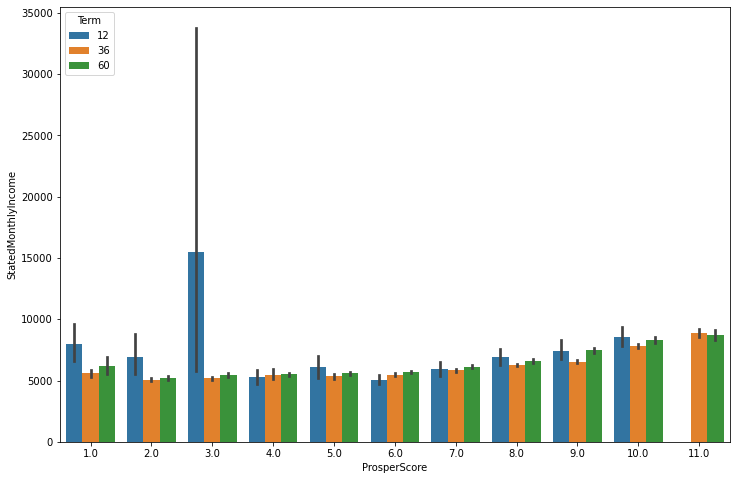

In [56]:
plt.figure(figsize = [12, 8]);
ax = sb.barplot(data = loans_trunc, x = 'ProsperScore', y = 'StatedMonthlyIncome', hue = 'Term');


Stated income has a positive relationship with ProsperScore, 12 month terms are more common with higher income.  Interestingly some of the lower Prosper scores on 12 month terms are skewed toward higher incomes.

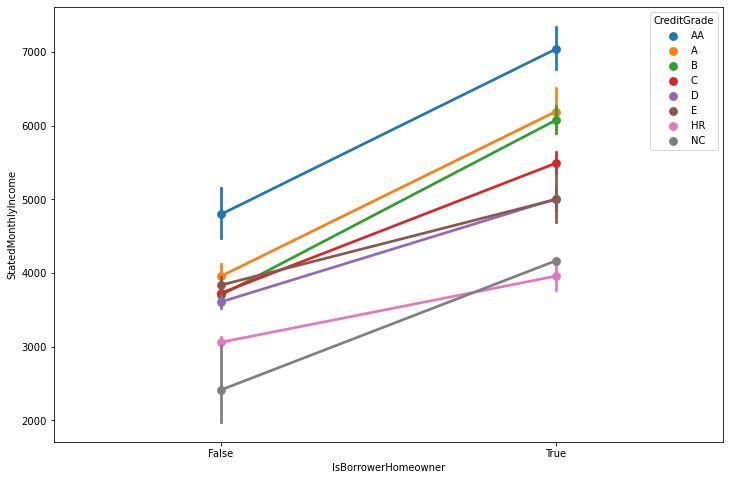

In [57]:
plt.figure(figsize = [12, 8])
ax = sb.pointplot(data = loans_trunc, x = 'IsBorrowerHomeowner', y = 'StatedMonthlyIncome', hue = 'CreditGrade')

Homeowners have higher stated monthly incomes and also higher credit grades.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶ 

Multivariate analysis comes to similar conclusions as bivariate. Having a higher monthly income, being a homeowner, and having a higher Prosper Score or Credit Grade generally go together.  They also have shorter loan terms this may be because this group can quickly pay down the loan.